# Visual Cryptography

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
plt.rc('figure', dpi=125)
BLACK = 0
WHITE= 1

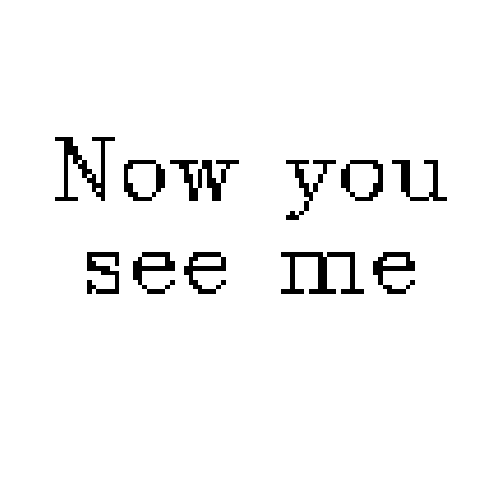

In [2]:
FONT = cv.FONT_HERSHEY_COMPLEX

# Create a black and white image (all ones) of size 100x100 pixels
img = np.ones((100, 100), dtype=np.uint8)

# Parameters: Image, Text, Position, Font, Size, Color (RGB), Thickness
cv.putText(img, 'Now you', (8, 40), FONT, 0.6, (0, 0, 0), 1)
cv.putText(img, 'see me', (14, 60), FONT, 0.6, (0, 0, 0), 1)

# Convert the image to boolean type, where all non-zero elements become True
img = img.astype(bool)

# Display the resulting image using matplotlib, with a grayscale colormap
plt.imshow(img, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()


In [3]:
def split_shares(img):
    '''
    image mask share1 share2
    0     0    10     01 
    0     1    01     10
    1     0    10     10
    1     1    01     01
    '''
    WIDTH, HEIGHT = img.shape
    share1, share2 = np.zeros((2, HEIGHT, WIDTH, 2))
    
    # Generate a random binary mask
    mask = np.random.rand(HEIGHT, WIDTH) >= 0.5
    
    # Assign values to share and share2
    share1[(img == 0) & (mask == 0)] = [1, 0]
    share2[(img == 0) & (mask == 0)] = [0, 1]

    share1[(img == 0) & (mask == 1)] = [0, 1]
    share2[(img == 0) & (mask == 1)] = [1, 0]

    share1[(img == 1) & (mask == 0)] = [1, 0]
    share2[(img == 1) & (mask == 0)] = [1, 0]

    share1[(img == 1) & (mask == 1)] = [0, 1]
    share2[(img == 1) & (mask == 1)] = [0, 1]
    
    # Reshape share1 and share2 to 1D arrays and convert them to boolean type
    share1 = share1.reshape(HEIGHT, 2*WIDTH).astype(bool)
    share2 = share2.reshape(HEIGHT, 2*WIDTH).astype(bool)
    
    return share1, share2

def join_shares(share1, share2):
    '''    
    share1 share2 output
    0      0      0
    0      1      0
    1      0      0
    1      1      1
    '''
    return share1 == share2

def overlap_shares(share1, share2):
    return ~(share1 | share2)


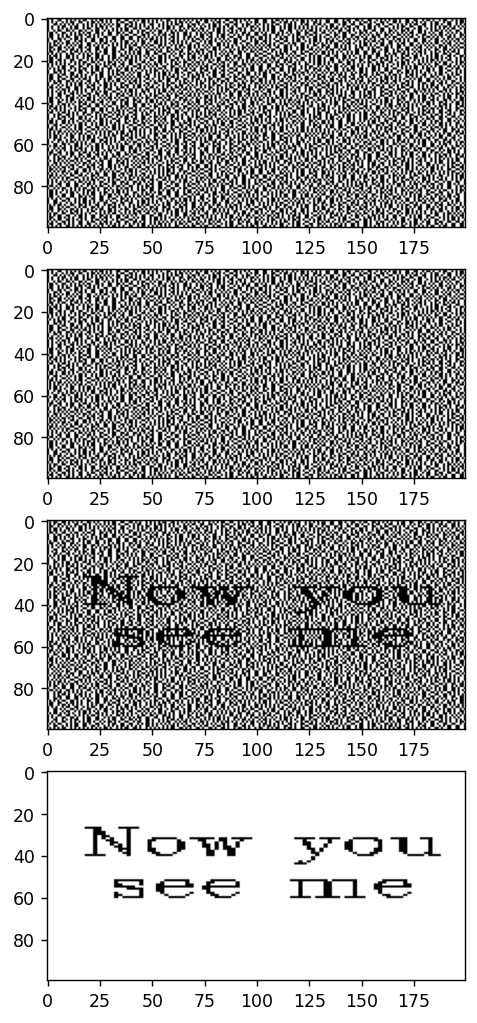

In [4]:
share1, share2 = split_shares(img)
joined = join_shares(share1, share2)
overlapped = overlap_shares(share1, share2)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, figsize=(6, 10))
ax1.imshow(share1, cmap='gray')
ax2.imshow(share2, cmap='gray')
ax3.imshow(overlapped, cmap='gray')
ax4.imshow(joined, cmap='gray')